In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')

In [3]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [4]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
DF['World without China'] = DF.World - DF.China
#DF.index.rename('Date', inplace = True)

In [5]:
Countries = ['India', 'World', 'World without China',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'UK', 'France', 'Brazil',
                      'S.Korea', 'Iran', 'Belgium', 
                       'Russia', 'Mexico', 'Canada']#[::-1]
Other_Countries = ['Belgium', 'Brazil', 'Canada', 'China', 'Ecuador', 'France', 'Germany',
       'India', 'Iran', 'Ireland', 'Italy', 'Mexico', 'Netherlands', 'Peru',
       'Portugal', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'US',
       'UK', 'World', 'S.Korea']
colors = {'India': 'Blue', 'World': 'Blue', 'World without China': 'Green', 'US': 'Black', 'China': 'red', 
          'Spain': 'yellow','Italy': 'grey', 'Iran': 'brown', 'Ireland': 'violet', 'UK': 'Purple', 
          'S.Korea': 'Black', 'France': 'orange', 'Germany': 'lime', 'Australia': 'Teal',
          'Russia': 'Brown', 'Mexico': 'Orange', 'Canada': 'Teal', 'Brazil': 'darkgreen', 'Belgium': 'cyan'}

In [6]:
def plotter(DF, name, scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [7]:
def plotwrtConfirmed(DF2, name1, DF, name2 = 'Confirmed', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [8]:
Confirmed = DF

In [9]:
Confirmed[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-11-24,9222216,59801026,59708730,12591366,963192,1455022,1594844,92296,1542611,2206126,6118708,31735,880542,561803,2120836,1060152,346013
2020-11-25,9266705,60434071,60341669,12772653,995879,1480874,1605066,92402,1560872,2221874,6166606,32318,894385,564967,2144229,1070487,350971
2020-11-26,9309787,61015385,60922897,12883307,1017830,1509875,1617355,92488,1578429,2235537,6204220,32887,908346,567532,2169424,1078594,356650
2020-11-27,9351109,61687703,61595117,13088821,1038649,1538217,1628208,92586,1593250,2248209,6238350,33375,922397,570829,2196691,1078594,362604
2020-11-28,9392919,62286404,62193723,13244701,1052494,1564532,1628208,92681,1609141,2260789,6290272,33824,935799,574448,2223500,1101403,368279
2020-11-29,9431691,62773118,62680304,13383370,1055691,1585178,1628208,92814,1621305,2270573,6314740,34201,948749,576599,2249890,1107071,373662
2020-11-30,9462809,63279028,63186126,13541221,1069912,1601554,1648187,92902,1633733,2274902,6335878,34652,962070,577345,2275936,1113543,381557
2020-12-01,9499413,63883987,63790994,13721858,1094678,1620901,1656444,92993,1647230,2283172,6386787,35163,975951,579212,2302062,1122362,387052
2020-12-02,9534964,64530519,64437406,13921913,1117953,1641610,1665775,93113,1663467,2297393,6436650,35703,989572,582252,2327105,1133613,393506
2020-12-03,9571559,65221042,65127821,14139577,1141544,1664829,1675902,93221,1678418,2310271,6487084,36332,1003494,584857,2354934,1144643,399770


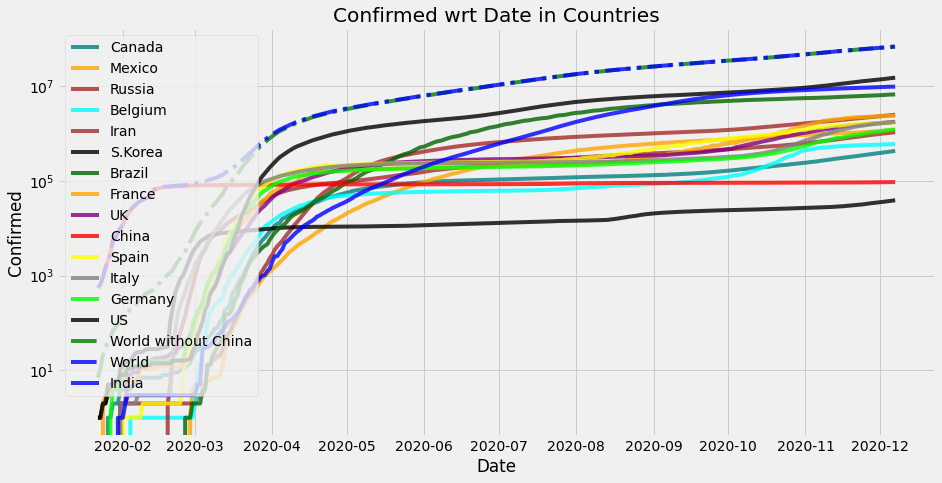

In [10]:
plotter(Confirmed, 'Confirmed')
# Confirmed.transpose().to_csv('CSVs/Confirmed.csv')

In [11]:
Biweekly_Confirmed = np.round((Confirmed - Confirmed.shift(14))/14, 2)
Biweekly_Confirmed = Biweekly_Confirmed.fillna(0)#.astype('int')
Biweekly_Confirmed[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-11-24,41871.79,590574.71,590533.50,165922.86,17678.50,32825.64,15259.00,41.21,21815.21,23402.00,29978.79,281.14,12661.00,3880.57,22719.57,5830.07,4966.57
2020-11-25,41627.79,589691.64,589645.21,168611.29,18413.21,32317.86,13382.64,46.43,21476.71,21939.43,29924.71,312.57,12808.36,3541.14,22991.71,6022.14,5036.14
2020-11-26,41499.43,584975.79,584925.43,165004.64,18214.14,31676.71,12866.79,50.36,20336.71,20528.79,30188.43,339.57,12982.93,3367.07,23267.57,6197.07,5050.79
2020-11-27,41259.29,586632.57,586576.93,167000.79,18111.14,30779.57,12115.50,55.64,19444.21,19718.57,30549.86,359.79,13148.21,3272.64,23664.00,5800.07,5135.36
2020-11-28,41310.00,586972.86,586911.93,166224.36,18054.36,29998.57,12115.50,60.93,18659.57,18324.64,31522.36,377.00,13305.29,3083.43,23976.00,7010.71,5224.29
2020-11-29,41897.43,587905.79,587836.93,166419.21,18053.21,29046.36,12115.50,68.86,17744.36,17078.64,32260.50,388.00,13334.36,2904.29,24267.21,7182.07,5301.57
2020-11-30,42037.07,586252.00,586178.43,166421.43,18027.57,28262.36,10808.79,73.57,17102.43,16686.36,32815.29,403.86,13353.50,2819.57,24516.07,7439.07,5434.57
2020-12-01,41893.29,586019.14,585940.00,167854.50,17922.93,27344.93,10458.64,79.14,16633.64,13999.21,33930.64,418.00,13391.29,2757.64,24796.43,7943.50,5508.36
2020-12-02,41177.21,587623.43,587537.21,169964.64,17890.64,26375.57,10031.00,86.21,16390.21,12976.86,35057.21,432.07,13405.57,2604.64,25105.43,8467.29,5646.64
2020-12-03,40513.86,590463.14,590371.29,172081.14,17858.50,25450.07,9594.86,91.86,15819.86,12369.64,36094.07,451.07,13455.50,2470.93,25426.29,8935.71,5751.64


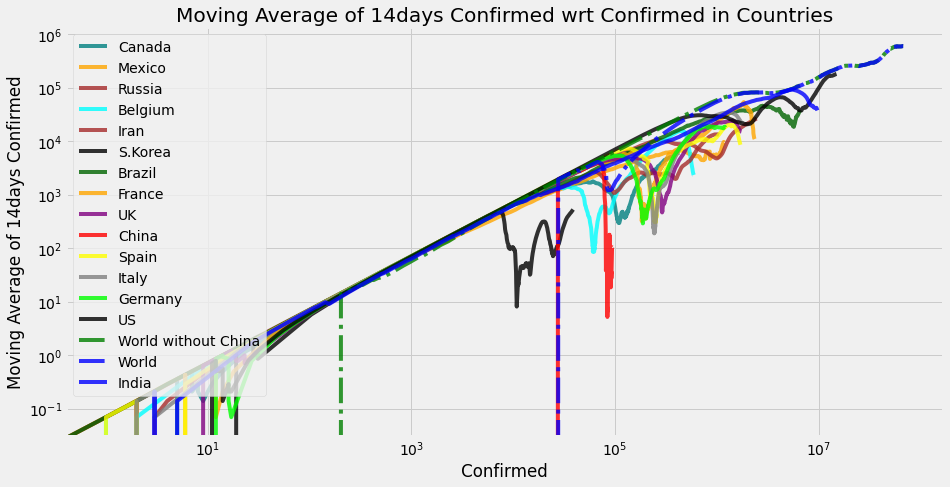

In [13]:
plotwrtConfirmed(Biweekly_Confirmed, 'Moving Average of 14days Confirmed', Confirmed)
# Biweekly_Confirmed.transpose().to_csv('CSVs/Biweekly_Confirmed.csv')

In [14]:
Weekly_Confirmed = np.round((Confirmed - Confirmed.shift(7))/7)
Weekly_Confirmed = Weekly_Confirmed.fillna(0).astype('int')
Weekly_Confirmed[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-11-24,44187,588758,588699,174210,17062,30993,12117,59,18322,16992,29564,346,13153,3028,23703,7000,5154
2020-11-25,44032,590040,589969,175749,18342,29789,11389,71,18124,15165,31537,381,13213,2740,24086,7917,5217
2020-11-26,43632,580118,580039,164695,18044,28764,10826,79,17356,14063,31779,410,13318,2467,24351,8436,5343
2020-11-27,42930,581041,580954,166123,17790,27493,10211,87,16577,12552,31169,425,13431,2450,24809,7518,5481
2020-11-28,42445,582808,582716,162949,17786,26286,10211,92,16001,11824,33927,442,13499,2506,25134,9816,5584
2020-11-29,41689,583156,583057,162358,17618,25187,10211,100,15072,11342,34763,457,13484,2546,25433,9314,5675
2020-11-30,40710,580901,580802,160406,17584,24251,9367,99,14638,11280,35467,471,13607,2492,25598,9169,5832
2020-12-01,39600,583280,583181,161499,18784,23697,8800,100,14946,11007,38297,490,13630,2487,25889,8887,5863
2020-12-02,38323,585207,585105,164180,17439,22962,8673,102,14656,10788,38578,484,13598,2469,26125,9018,6076
2020-12-03,37396,600808,600703,179467,17673,22136,8364,105,14284,10676,40409,492,13593,2475,26501,9436,6160


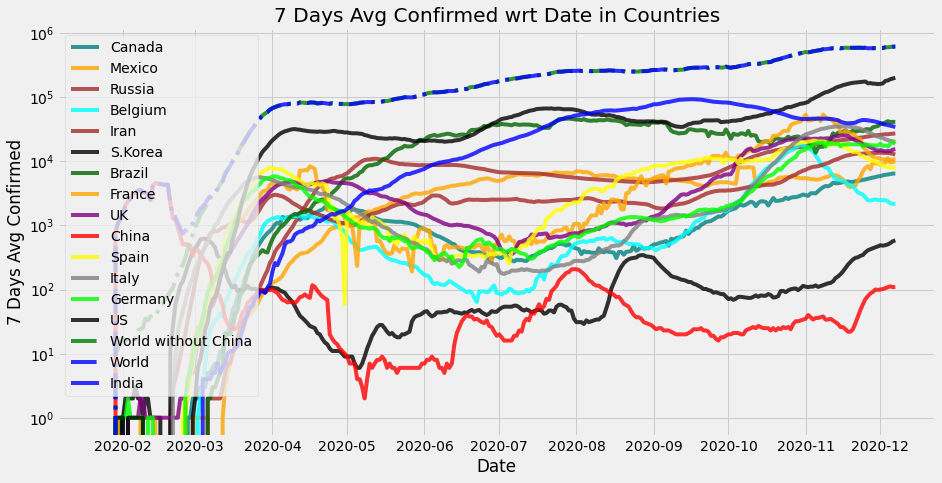

In [15]:
plotter(Weekly_Confirmed, '7 Days Avg Confirmed')

In [16]:
ThreeDaysConfirmed = np.round((Confirmed - Confirmed.shift(3))/3)
ThreeDaysConfirmed = ThreeDaysConfirmed.fillna(0).astype('int')
ThreeDaysConfirmed[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-11-24,42137,531425,531339,162437,11734,24830,12705,86,15159,9368,21974,334,13078,1633,24424,9155,5607
2020-11-25,42280,581016,580920,175263,21171,24002,16112,95,15023,10231,31735,438,13341,2063,24124,9537,5678
2020-11-26,43982,600887,600795,154976,23669,26027,11580,92,15721,13199,38871,511,13842,2543,24225,9745,5306
2020-11-27,42964,628892,628796,165818,25152,27732,11121,97,16880,14028,39881,547,13952,3009,25285,6147,5530
2020-11-28,42071,617444,617351,157349,18872,27886,7714,93,16090,12972,41222,502,13805,3160,26424,10305,5769
2020-11-29,40635,585911,585802,166688,12620,25101,3618,109,14292,11679,36840,438,13468,3022,26822,9492,5671
2020-11-30,37233,530442,530336,150800,10421,21112,6660,105,13494,8898,32509,426,13224,2172,26415,11650,6318
2020-12-01,35498,532528,532424,159052,14061,18790,9412,104,12696,7461,32172,446,13384,1588,26187,6986,6258
2020-12-02,34424,585800,585701,179514,20754,18811,12522,100,14054,8940,40637,501,13608,1884,25738,8847,6615
2020-12-03,36250,647338,647232,199452,23877,21092,9238,106,14895,11790,50402,560,13808,2504,26333,10367,6071


In [17]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-11-24,44376,588303,588218,172988,16370,23227,12228,85,11344,10186,31100,382,13721,1901,24087,10794,5282
2020-11-25,44489,633045,632939,181287,32687,25852,10222,106,18261,15748,47898,583,13843,3164,23393,10335,4958
2020-11-26,43082,581314,581228,110654,21951,29001,12289,86,17557,13663,37614,569,13961,2565,25195,8107,5679
2020-11-27,41322,672318,672220,205514,20819,28342,10853,98,14821,12672,34130,488,14051,3297,27267,0,5954
2020-11-28,41810,598701,598606,155880,13845,26315,0,95,15891,12580,51922,449,13402,3619,26809,22809,5675
2020-11-29,38772,486714,486581,138669,3197,20646,0,133,12164,9784,24468,377,12950,2151,26390,5668,5383
2020-11-30,31118,505910,505822,157851,14221,16376,19979,88,12428,4329,21138,451,13321,746,26046,6472,7895
2020-12-01,36604,604959,604868,180637,24766,19347,8257,91,13497,8270,50909,511,13881,1867,26126,8819,5495
2020-12-02,35551,646532,646412,200055,23275,20709,9331,120,16237,14221,49863,540,13621,3040,25043,11251,6454
2020-12-03,36595,690523,690415,217664,23591,23219,10127,108,14951,12878,50434,629,13922,2605,27829,11030,6264


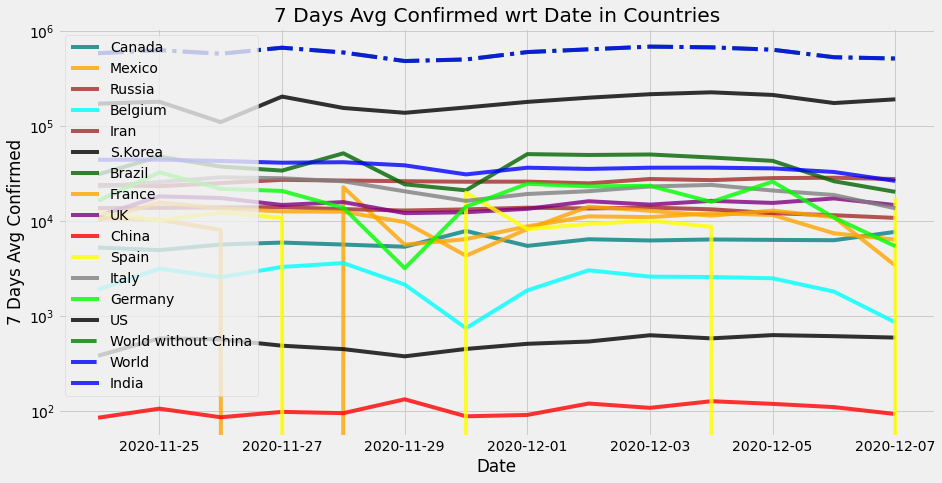

In [18]:
plotter(Daily_Confirmed.tail(14), '7 Days Avg Confirmed', scale = 'log')
# Daily_Confirmed.transpose().to_csv('CSVs/Daily_Confirmed.csv')

In [19]:
Reproductivity = np.round(Weekly_Confirmed/Biweekly_Confirmed.shift(10), 4)#.iloc[-1]
Reproductivity[Countries].iloc[-1]

Country/Region
India                  0.8343
World                  1.0501
World without China    1.0500
US                     1.2045
Germany                1.0262
Italy                  0.6544
Spain                  0.6384
China                  1.9770
UK                     0.7993
France                 0.5373
Brazil                 1.3469
S.Korea                1.6287
Iran                   0.9703
Belgium                0.6664
Russia                 1.1532
Mexico                 1.6922
Canada                 1.2523
Name: 2020-12-07 00:00:00, dtype: float64

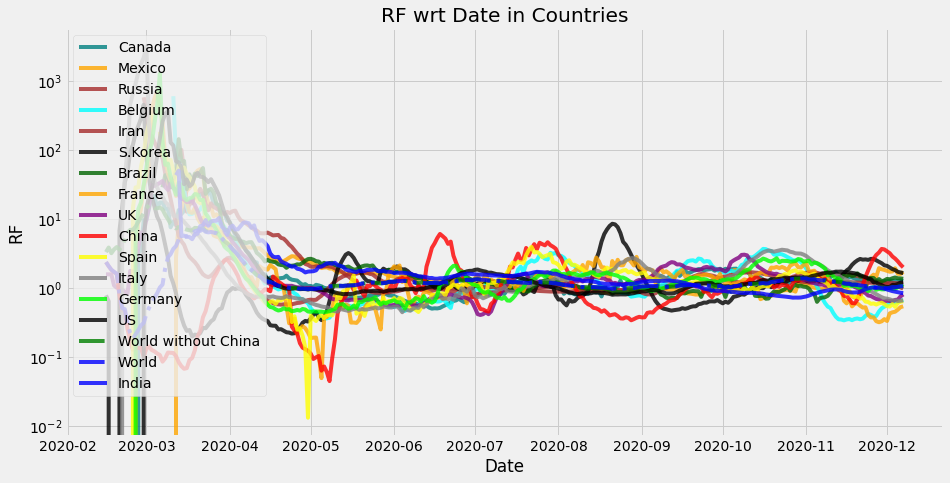

In [20]:
plotter(Reproductivity, 'RF')
# Reproductivity.transpose().to_csv('CSVs/Reproductivity.csv')

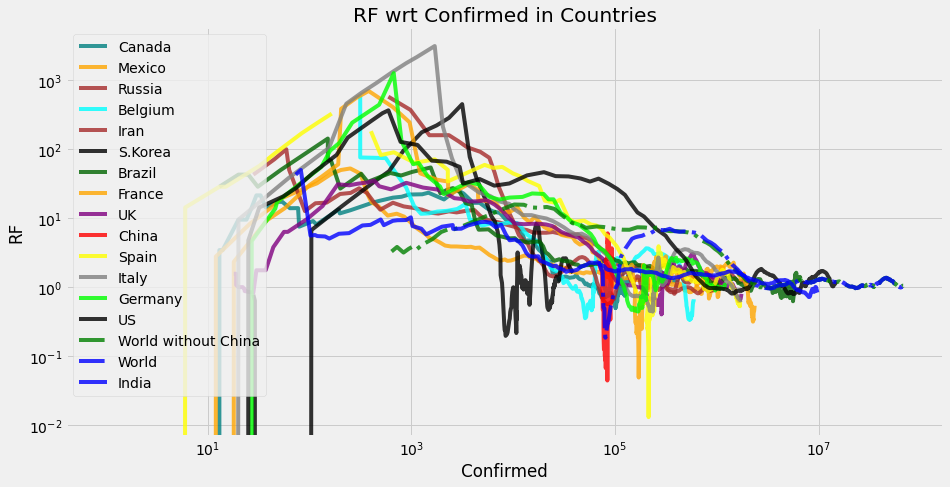

In [21]:
plotwrtConfirmed(Reproductivity, 'RF', Confirmed)

In [22]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Confirmed.columns
LastDay_DF = LastDay_DF.set_index('Country')

In [23]:
D = {
    'Confirmed':Confirmed,
    'Biweekly Confirmed':Biweekly_Confirmed,
    'Weekly Confirmed': Weekly_Confirmed,
    'Triday Confirmed': ThreeDaysConfirmed,
    'Daily Confirmed':Daily_Confirmed,
    'Reproductive Factor':Reproductivity,
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
All_lastday = LastDay_DF
LastDay_DF = LastDay_DF[LastDay_DF.Confirmed>=100000]

In [24]:
LastDay_DF.sort_values('Confirmed', ascending = False)#.head(20)

,Confirmed,Biweekly Confirmed,Weekly Confirmed,Triday Confirmed,Daily Confirmed,Reproductive Factor
Country,,,,,,
World,67591203,598462.86,616025,563920,517473,1.0501
World without China,67497533,598358.64,615915,563813,517380,1.0500
US,14949299,180780.07,201154,193946,192299,1.2045
India,9703770,37566.43,34423,31853,26567,0.8343
Brazil,6623911,38307.36,41148,29981,20371,1.3469
Russia,2466961,26443.71,27289,28316,27798,1.1532
France,2349059,10937.07,10594,9119,3411,0.5373
Italy,1742557,22197.29,20143,17873,13679,0.6544
UK,1742525,15089.86,15542,15908,14774,0.7993


In [25]:
Growth = np.round(Weekly_Confirmed/Confirmed, 4)
#Growth = Growth.fillna(0)
Growth[Countries].tail(14)

Country/Region,India,World,World without China,US,Germany,Italy,Spain,China,UK,France,Brazil,S.Korea,Iran,Belgium,Russia,Mexico,Canada
2020-11-24,0.0048,0.0098,0.0099,0.0138,0.0177,0.0213,0.0076,0.0006,0.0119,0.0077,0.0048,0.0109,0.0149,0.0054,0.0112,0.0066,0.0149
2020-11-25,0.0048,0.0098,0.0098,0.0138,0.0184,0.0201,0.0071,0.0008,0.0116,0.0068,0.0051,0.0118,0.0148,0.0048,0.0112,0.0074,0.0149
2020-11-26,0.0047,0.0095,0.0095,0.0128,0.0177,0.0191,0.0067,0.0009,0.0110,0.0063,0.0051,0.0125,0.0147,0.0043,0.0112,0.0078,0.0150
2020-11-27,0.0046,0.0094,0.0094,0.0127,0.0171,0.0179,0.0063,0.0009,0.0104,0.0056,0.0050,0.0127,0.0146,0.0043,0.0113,0.0070,0.0151
2020-11-28,0.0045,0.0094,0.0094,0.0123,0.0169,0.0168,0.0063,0.0010,0.0099,0.0052,0.0054,0.0131,0.0144,0.0044,0.0113,0.0089,0.0152
2020-11-29,0.0044,0.0093,0.0093,0.0121,0.0167,0.0159,0.0063,0.0011,0.0093,0.0050,0.0055,0.0134,0.0142,0.0044,0.0113,0.0084,0.0152
2020-11-30,0.0043,0.0092,0.0092,0.0118,0.0164,0.0151,0.0057,0.0011,0.0090,0.0050,0.0056,0.0136,0.0141,0.0043,0.0112,0.0082,0.0153
2020-12-01,0.0042,0.0091,0.0091,0.0118,0.0172,0.0146,0.0053,0.0011,0.0091,0.0048,0.0060,0.0139,0.0140,0.0043,0.0112,0.0079,0.0151
2020-12-02,0.0040,0.0091,0.0091,0.0118,0.0156,0.0140,0.0052,0.0011,0.0088,0.0047,0.0060,0.0136,0.0137,0.0042,0.0112,0.0080,0.0154
2020-12-03,0.0039,0.0092,0.0092,0.0127,0.0155,0.0133,0.0050,0.0011,0.0085,0.0046,0.0062,0.0135,0.0135,0.0042,0.0113,0.0082,0.0154


In [26]:
def days100(DF):
    X = pd.DataFrame(list(DF['World']))
    for col in Countries:
        df = pd.Series(list(DF[Confirmed[col]>100][col]))
        #df = DF[col]>100
        X[col] = df
    X = X[Countries]
    X = X[[c for c in Countries if c not in ['World', 'China']]]
    return X

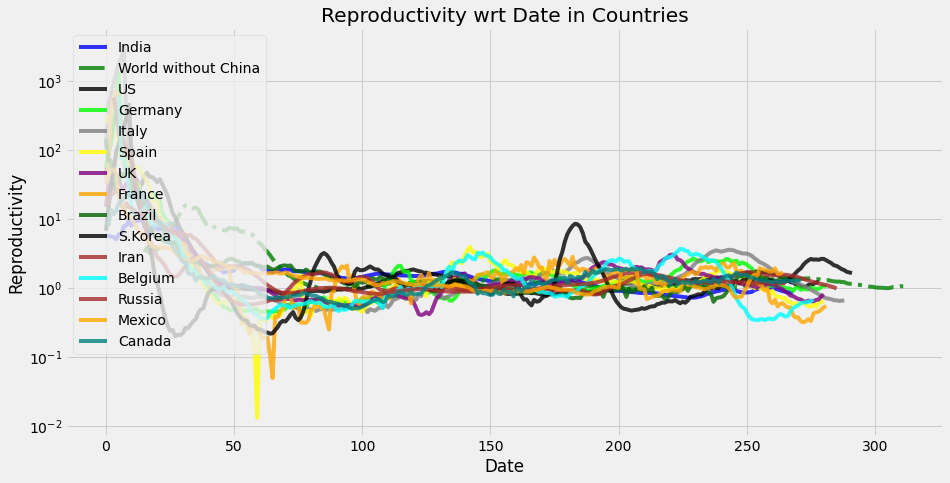

In [27]:
RF = days100(Reproductivity)
plotter(RF, 'Reproductivity', col = 'all')
# RF.transpose().to_csv('CSVs/RF50.csv')

In [28]:
LastDay_DF.index

Index(['Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Bolivia', 'Brazil', 'Bulgaria', 'Burma',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Czechia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Ethiopia', 'France',
       'Georgia', 'Germany', 'Greece', 'Guatemala', 'Honduras', 'Hungary',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Italy', 'Japan',
       'Jordan', 'Kazakhstan', 'Kuwait', 'Lebanon', 'Mexico', 'Moldova',
       'Morocco', 'Nepal', 'Netherlands', 'Oman', 'Pakistan', 'Panama', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
       'Saudi Arabia', 'Serbia', 'Slovakia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Tunisia', 'Turkey', 'US', 'Ukraine',
       'United Arab Emirates', 'UK', 'Venezuela', 'World',
       'World without China'],
      dtype='object', name='Country')

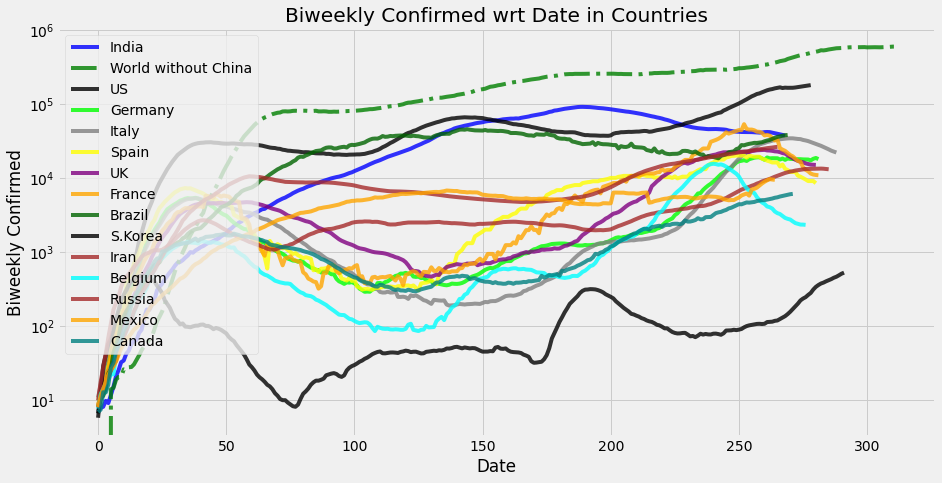

In [29]:
BD = days100(Biweekly_Confirmed)
plotter(BD, 'Biweekly Confirmed', col = 'all')
# BD.transpose().to_csv('CSVs/BiweeklyConfirmed50.csv')

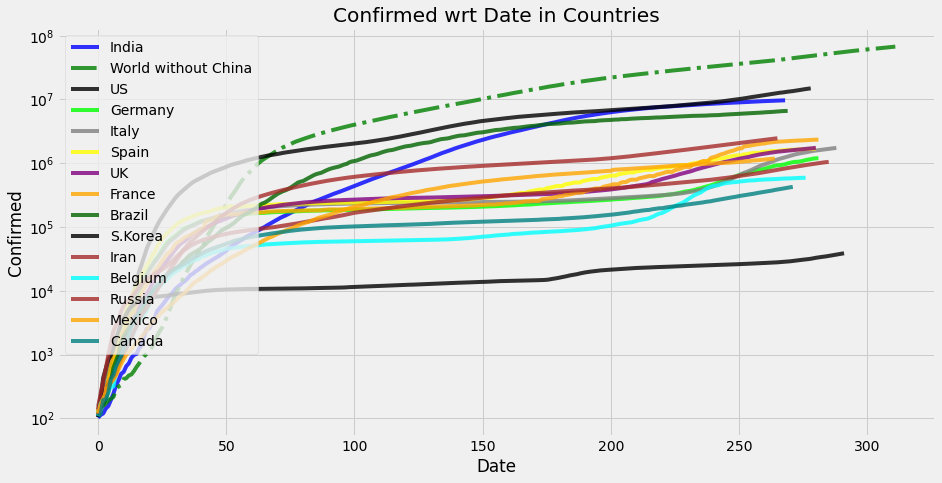

In [30]:
D = days100(Confirmed)
plotter(D, 'Confirmed', col = 'all')
# D.transpose().to_csv('CSVs/Confirmed50.csv')

In [31]:
Dates = pd.DataFrame(list(Confirmed.World))
Dates.index = Confirmed.index
for col in Confirmed.columns:
    Dates[col] = Confirmed.index
    pd.to_datetime(Dates[col])
Dates = days100(Dates)
# Dates.transpose().to_csv('CSVs/Dates50.csv')